<a href="https://colab.research.google.com/github/qpwisu/CommunityApp/blob/main/%EC%9B%90%EC%9E%90%EC%9E%AC%EC%99%80_%EC%A3%BC%EC%8B%9D%EC%83%81%EA%B4%80%EA%B4%80%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install bs4
#https://buyandpray.tistory.com/39

In [199]:
#https://kr.investing.com/에서 ajax를 통해 서버에 요청해 철광석 가격을 받아왔다
import re
headers = {
    'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Safari/537.36',
    'X-Requested-With' : 'XMLHttpRequest'
}
formData = {
    "curr_id" : "",
    "smlID" : "",
    "header" : "",
    "st_date" : "2021/06/01",
    "end_date" : "2022/02/13",
    "interval_sec" : "Daily",
    "sort_col" : "date",
    "sort_ord" : "DESC",
    "action" : "historical_data"
}

POSTURL = r"https://kr.investing.com/instruments/HistoricalDataAjax"

formData["curr_id"] = "961729"
formData["smlID"] = "301009"
formData["header"] = "철광석" + " 내역"

response = requests.post(POSTURL, headers=headers, data=formData)
if response.status_code == 200:
    html = response.text
    soup = BeautifulSoup(html,'html.parser') 
    items= soup.select("tr")
    items = items[1:-1]
    li= []

    for item in items:
     

      i = item.text.split("\n")[1:7]
      i[0]=re.sub(r"(\d{4})년 (\d{2})월 (\d{2})일",r"\g<1>-\g<2>-\g<3>",i[0])
      i.append(i[5].split(" ")[1])
      i[5]= i[5].split(" ")[0]
      li.append(i)
    print(li)
   


[['2022-02-11', '150.87', '150.87', '150.87', '150.87', '-', '-0.46%'], ['2022-02-10', '151.57', '151.57', '151.57', '151.57', '-', '2.66%'], ['2022-02-09', '147.64', '147.64', '147.64', '147.64', '-', '-0.80%'], ['2022-02-08', '148.83', '148.83', '148.83', '148.83', '-', '-0.85%'], ['2022-02-07', '150.11', '150.11', '150.11', '150.11', '0.03K', '3.20%'], ['2022-02-04', '145.45', '145.45', '145.45', '145.45', '-', '-0.34%'], ['2022-02-03', '145.95', '145.95', '145.95', '145.95', '0.01K', '4.26%'], ['2022-02-02', '139.98', '139.98', '139.98', '139.98', '-', '0.86%'], ['2022-02-01', '138.79', '138.79', '138.79', '138.79', '-', '5.83%'], ['2022-01-31', '131.15', '131.15', '131.15', '131.15', '-', '0.26%'], ['2022-01-28', '130.81', '130.81', '130.81', '130.81', '0.01K', '0.65%'], ['2022-01-27', '129.96', '129.96', '129.96', '129.96', '0.02K', '0.43%'], ['2022-01-26', '129.40', '129.40', '129.40', '129.40', '-', '-0.42%'], ['2022-01-25', '129.94', '129.94', '129.94', '129.94', '-', '0.93%']

In [205]:
import pandas as pd
name_list = ["날짜","종가","오픈","고가",'저기',"거래량","변동%"]
df = pd.DataFrame(li,columns=name_list)
df.set_index("날짜",inplace=True)
df=df[::-1]

In [133]:
pip install pykrx



     |████████████████████████████████| 92 kB 407 kB/s 
     |████████████████████████████████| 51 kB 365 kB/s 
     |████████████████████████████████| 251 kB 29.1 MB/s 


In [206]:
from pykrx import stock
from pykrx import bond
df2 = stock.get_market_ohlcv("20210601", "20220213", "001230")


In [251]:
print(df["종가"])
index1 = df["종가"].to_frame(name='철광석')
index2 = df2["종가"].to_frame(name='001230')
index1=index1.astype('float')
index2=index2.astype('float')
index1.reset_index(inplace=True)
index2.reset_index(inplace=True)
index1=index1.astype({'날짜':'string'})
index2=index2.astype({'날짜':'string'})
index1.set_index("날짜",inplace=True)
index2.set_index("날짜",inplace=True)


날짜
2021-06-01    204.90
2021-06-02    204.96
2021-06-03    208.00
2021-06-04    206.29
2021-06-07    202.41
               ...  
2022-02-07    150.11
2022-02-08    148.83
2022-02-09    147.64
2022-02-10    151.57
2022-02-11    150.87
Name: 종가, Length: 179, dtype: object


In [252]:
df3=pd.merge(index1, index2,left_index=True, right_index=True ,how='outer')
df3 =df3.dropna(axis=0)


In [255]:
#상관관계
corr = df3.corr(method = 'pearson')
corr

,철광석,001230
철광석,1.000000,0.833428
001230,0.833428,1.000000


                 철광석    001230
날짜                            
2021-06-01  0.883637  1.000000
2021-06-02  0.884107  0.957672
2021-06-03  0.907896  0.888889
2021-06-04  0.894514  0.947090
2021-06-07  0.864152  0.835979
...              ...       ...
2022-02-07  0.454887  0.153439
2022-02-08  0.444870  0.137566
2022-02-09  0.435558  0.264550
2022-02-10  0.466312  0.253968
2022-02-11  0.460834  0.264550

[169 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52384 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44305 missing from current font.
  font.set_text

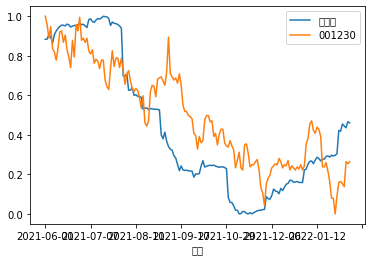

In [259]:
#정규화
def minmax_norm(df):
    return (df - df.min()) / ( df.max() - df.min())
df_minmax_norm = minmax_norm(df3)
print(df_minmax_norm)
df_minmax_norm.plot()